### DEL 1

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

In [22]:
data = pd.read_csv('dataset.csv', sep=';')
data.dropna(subset=['Viklingstemperatur L1 [°C]', 'Kjøling varmluft ut [°C]'], inplace=True)
#train, temp_test = train_test_split(data, test_size=0.30, random_state=42, shuffle=False)
#validation, test = train_test_split(temp_test, test_size=0.50, random_state=42, shuffle=False)

train_size = int(len(data) * 0.70)
val_size = int(len(data) * 0.15)

train = data.iloc[:train_size]
validation = data.iloc[train_size:train_size + val_size]
test = data.iloc[train_size + val_size:]

In [23]:
# sns.pairplot(data.iloc[:, 1:])

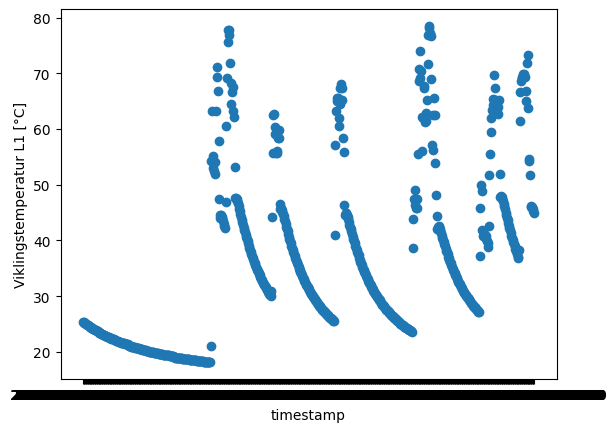

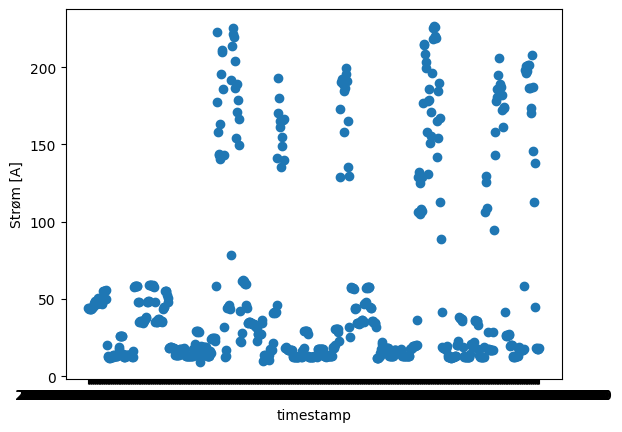

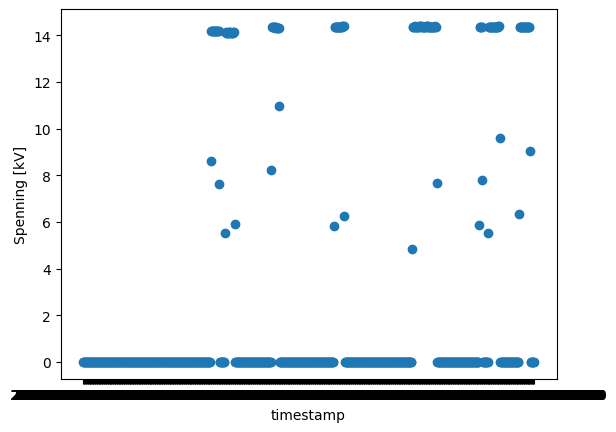

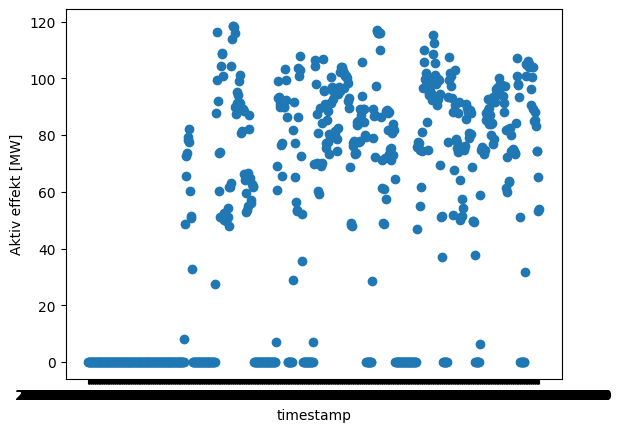

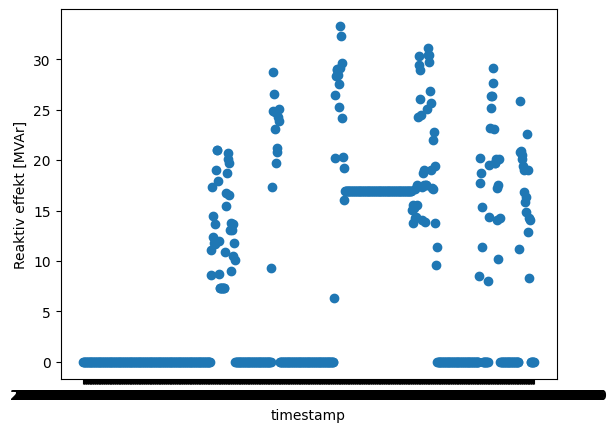

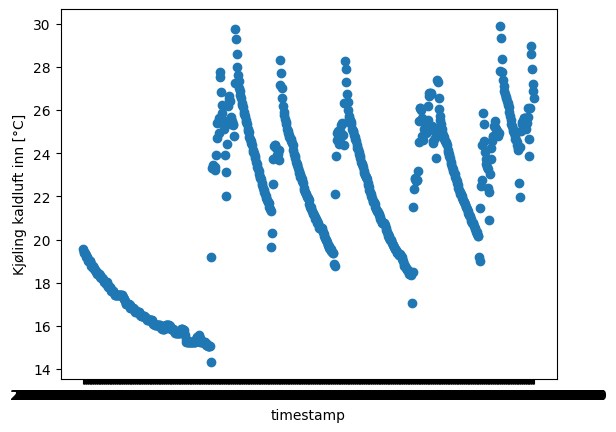

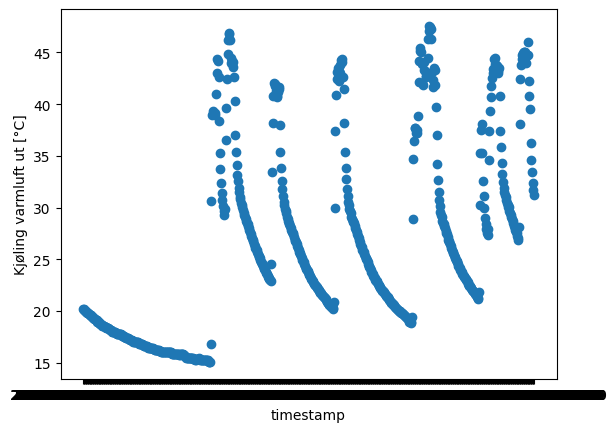

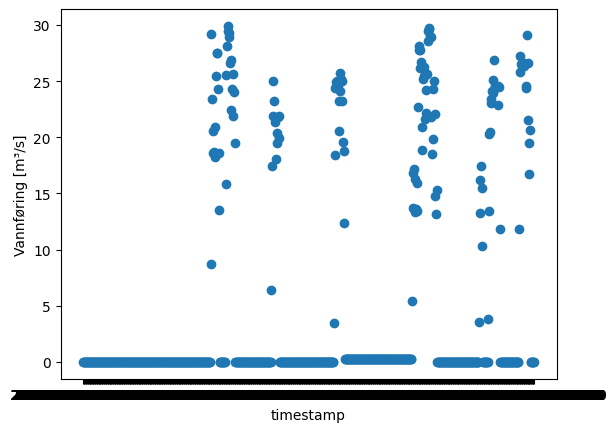

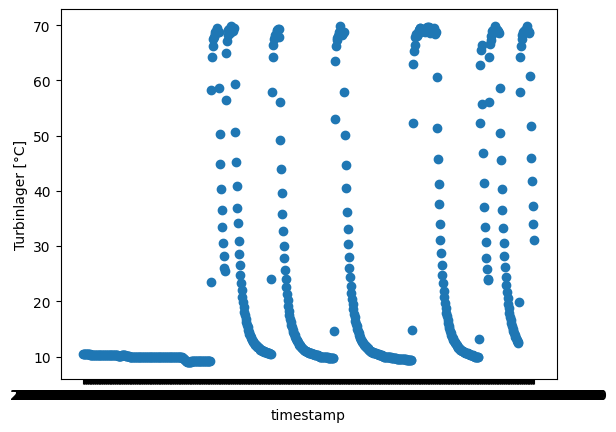

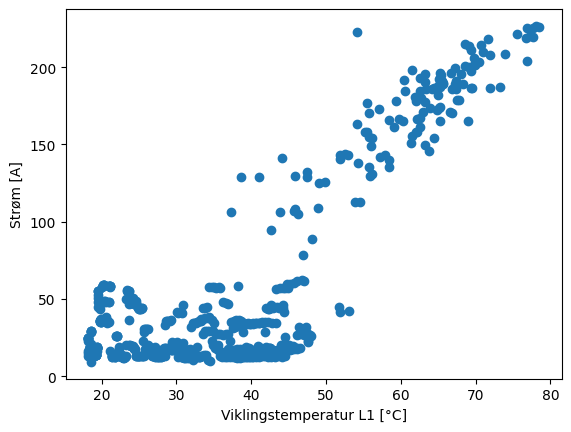

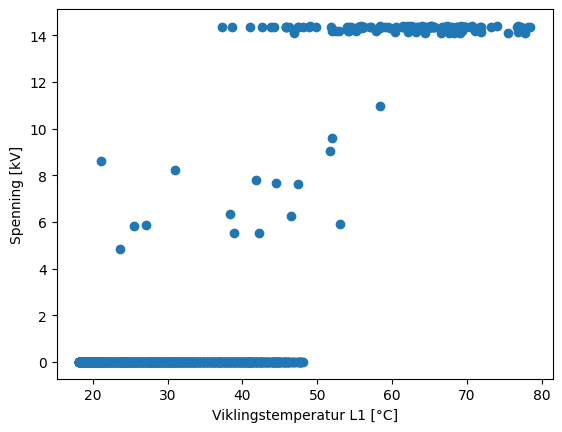

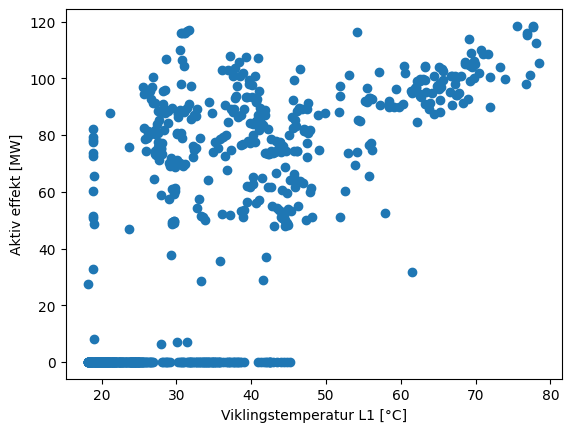

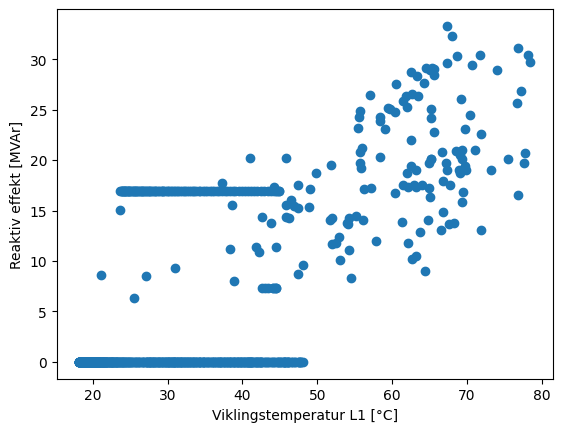

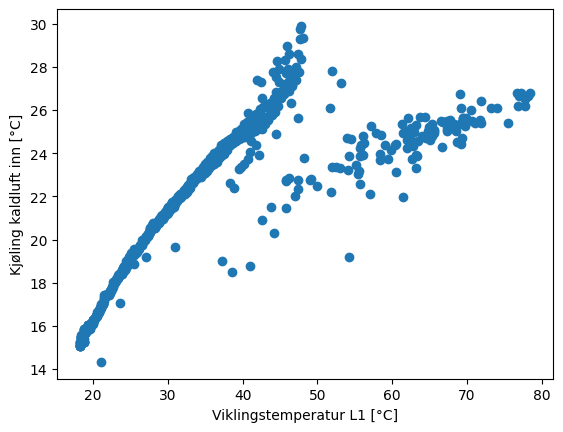

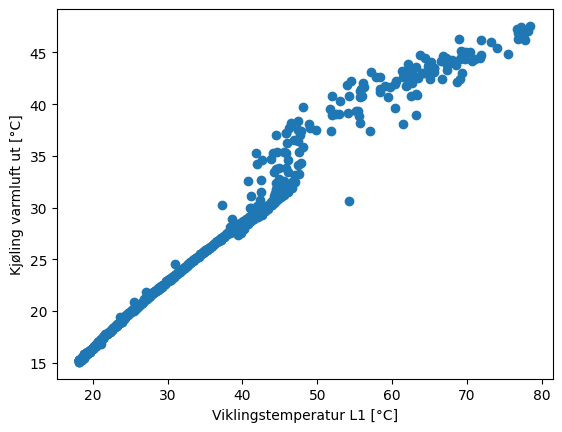

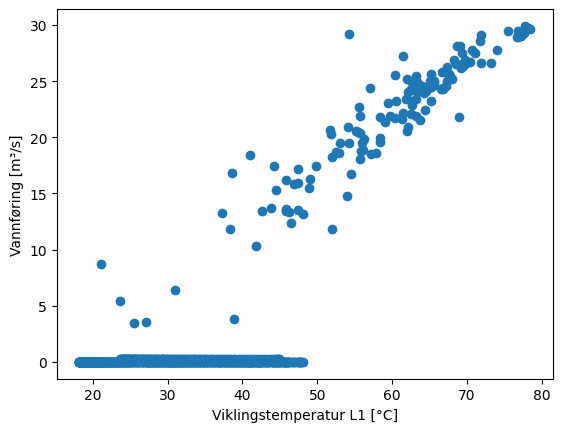

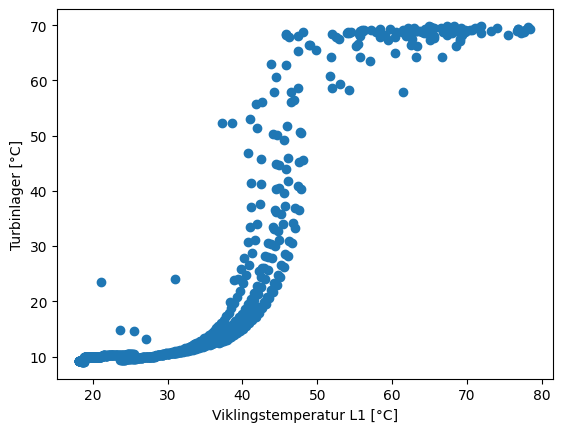

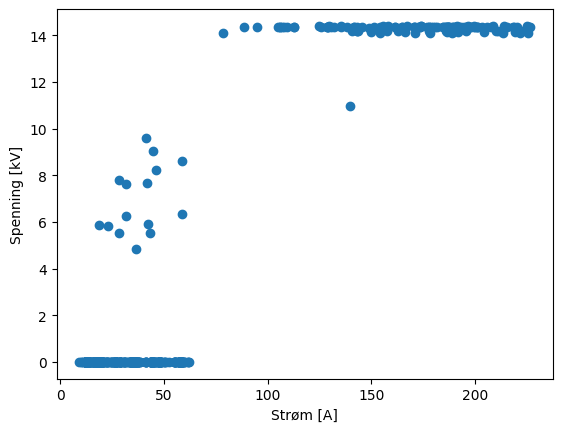

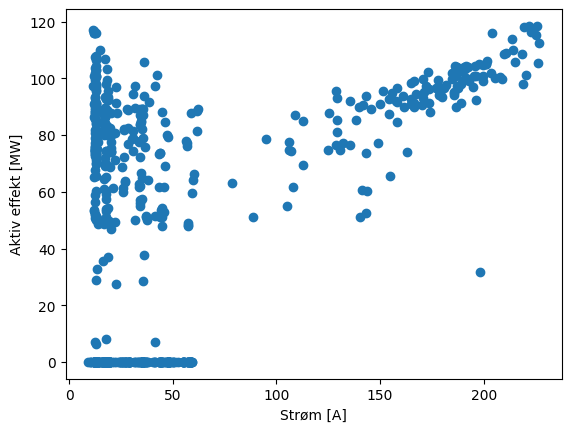

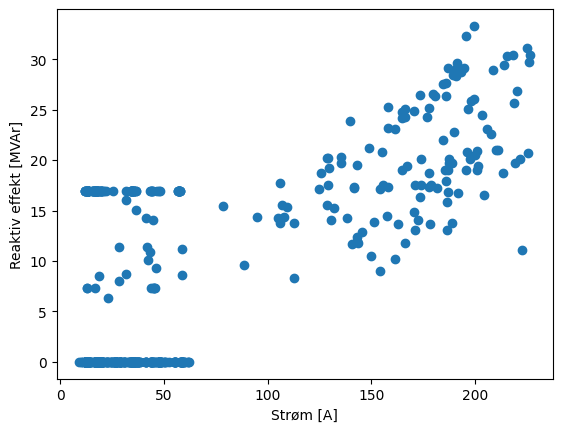

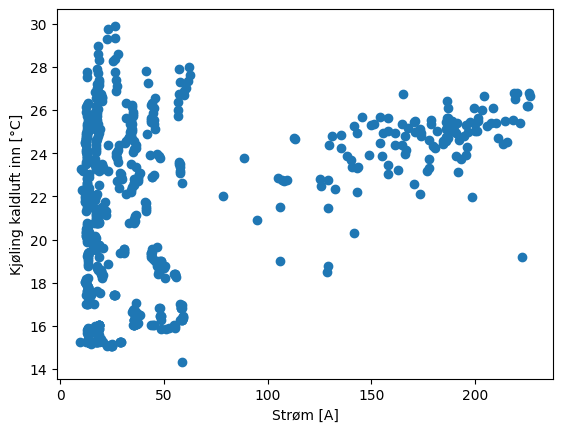

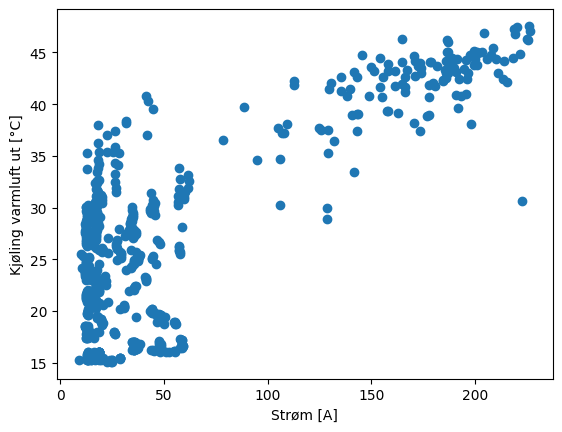

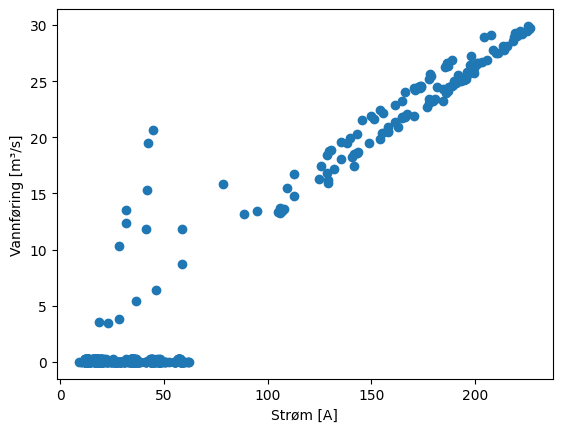

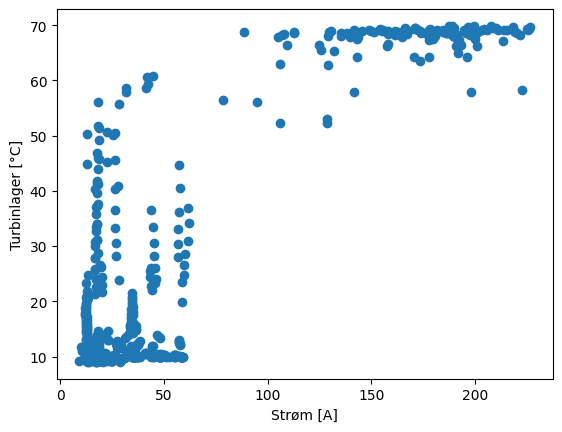

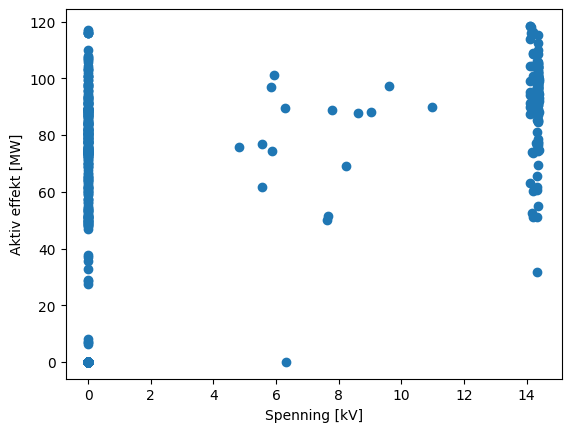

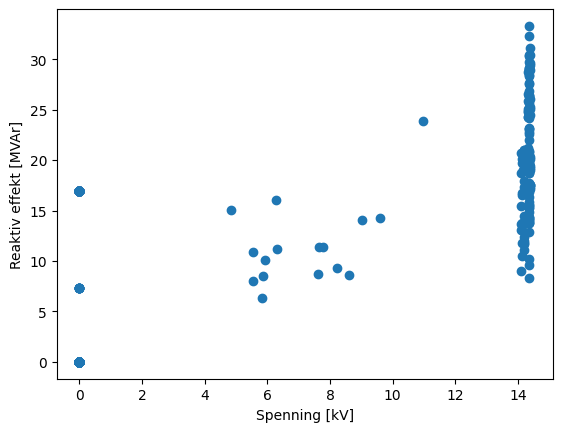

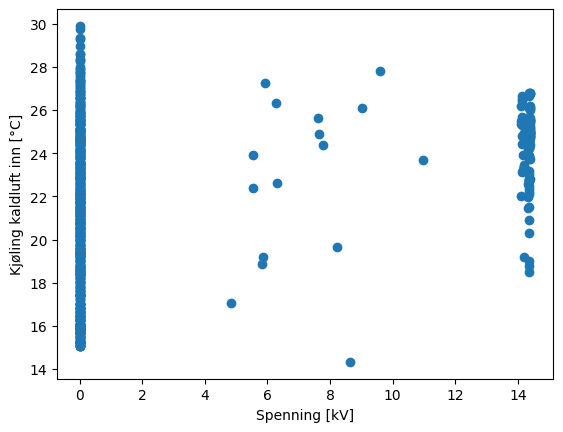

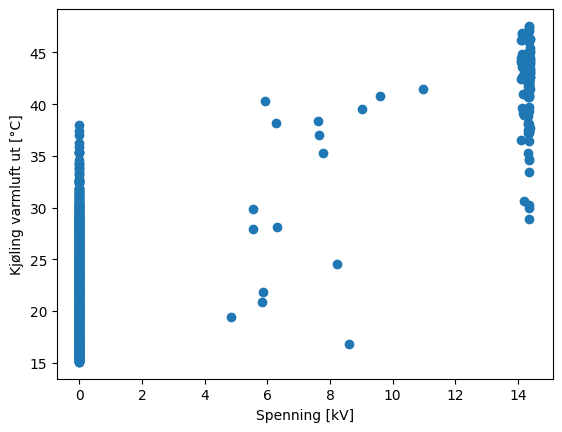

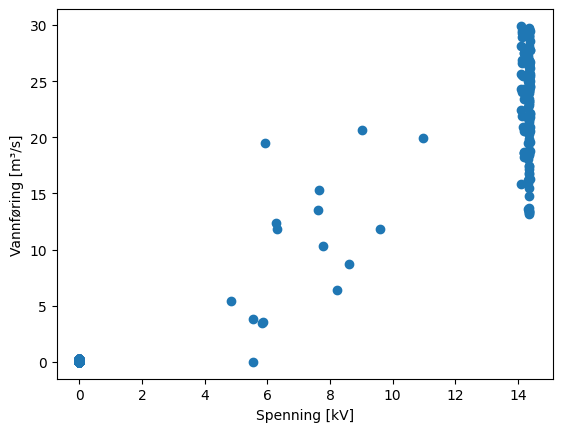

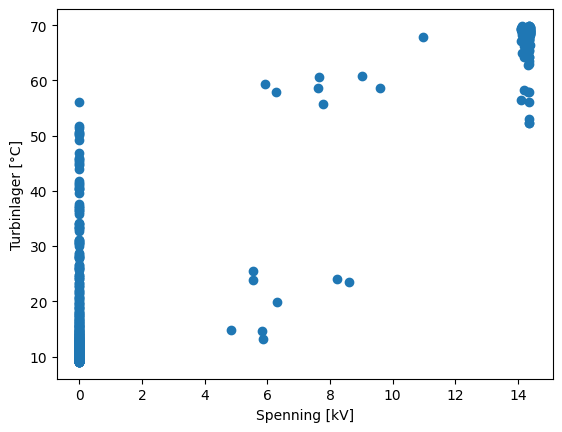

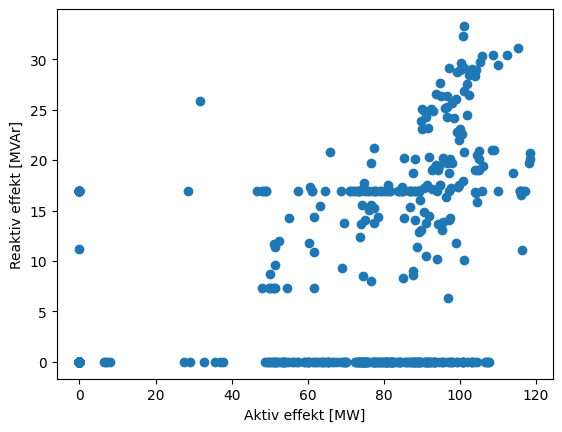

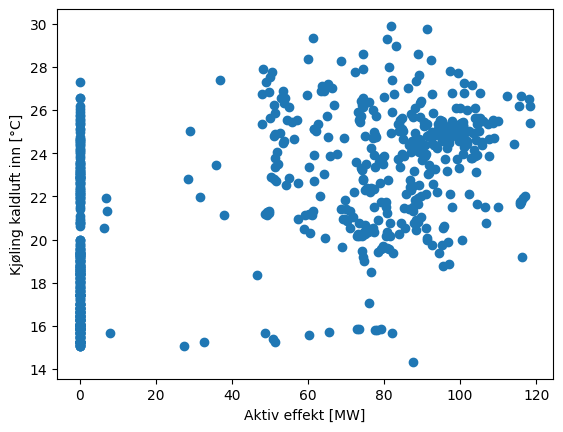

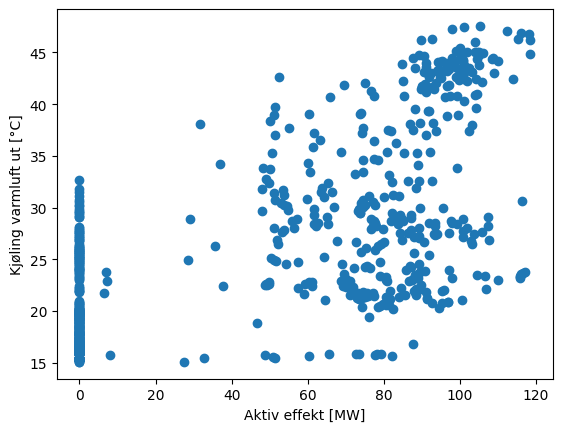

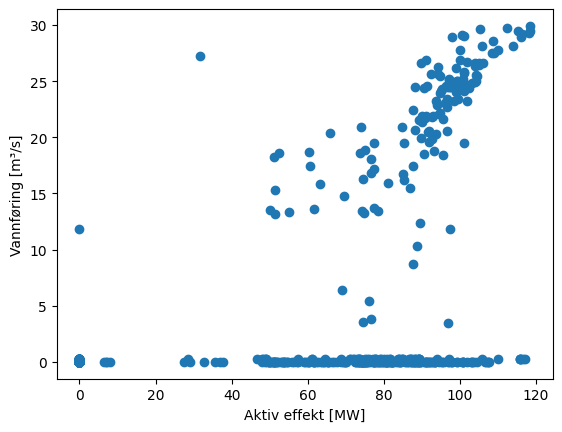

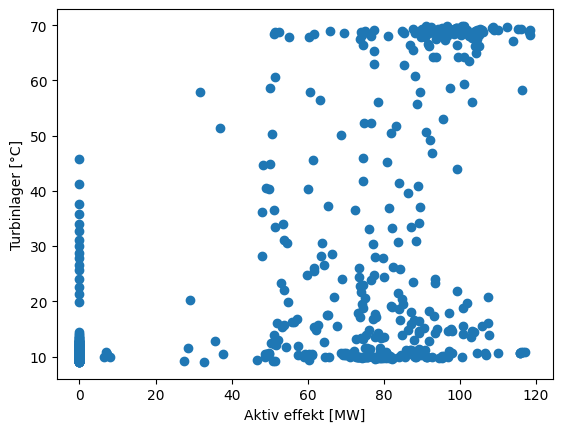

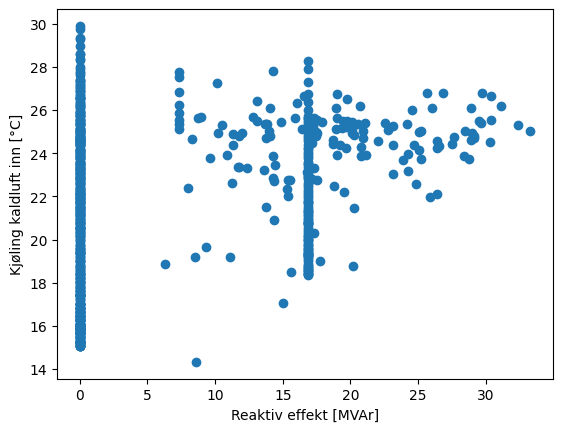

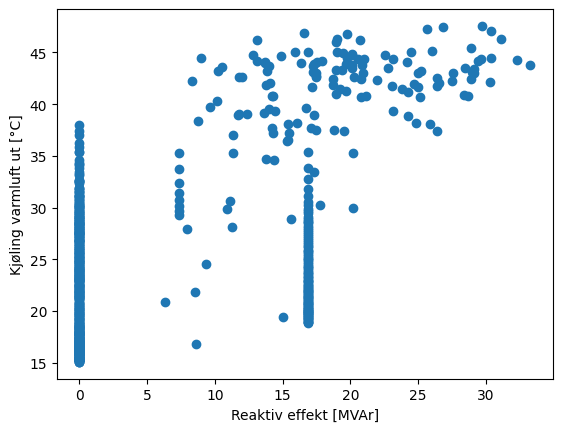

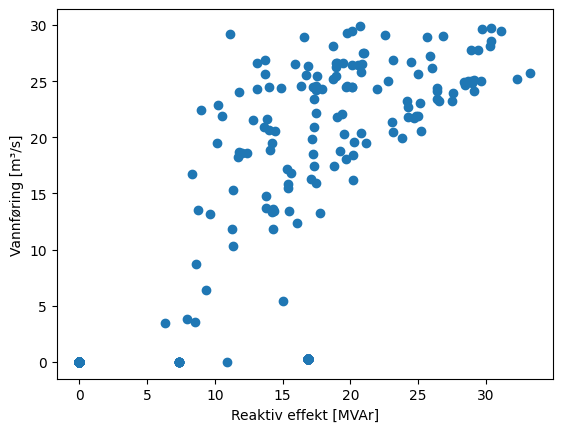

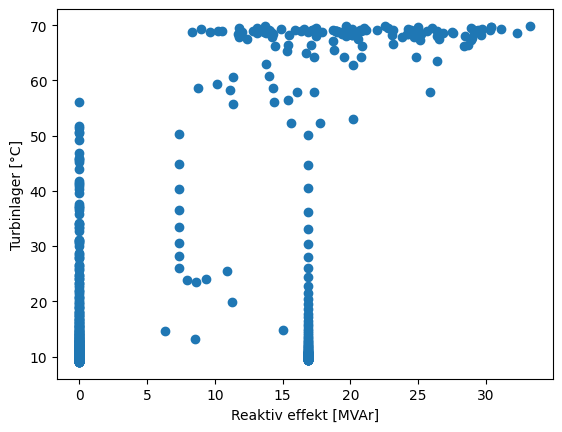

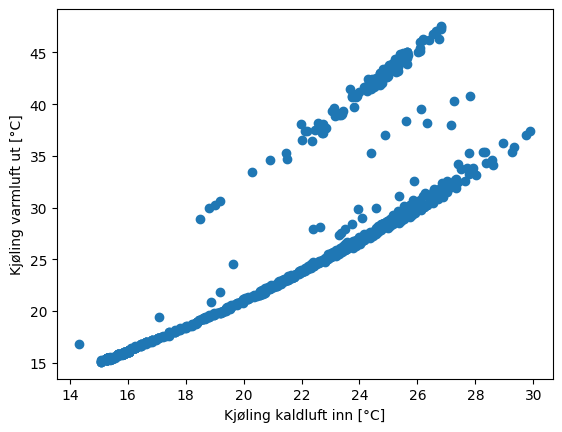

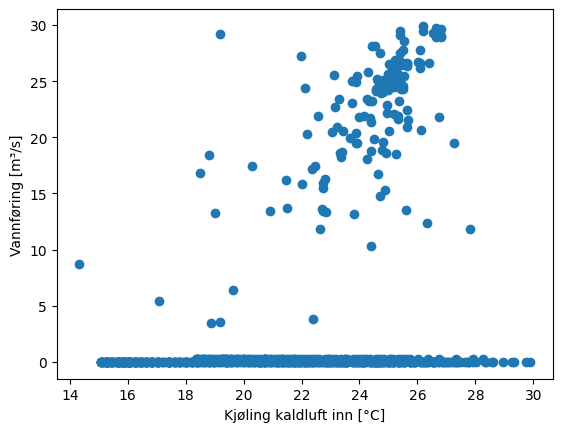

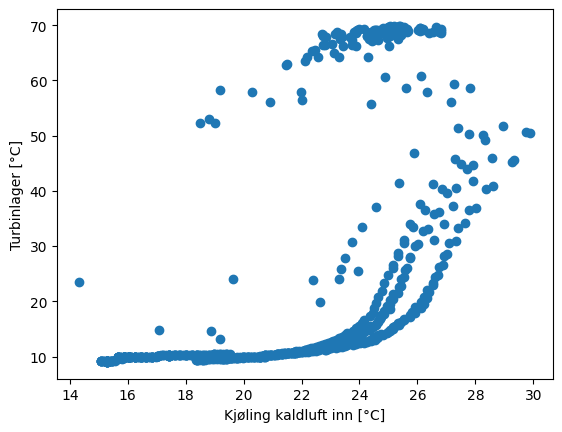

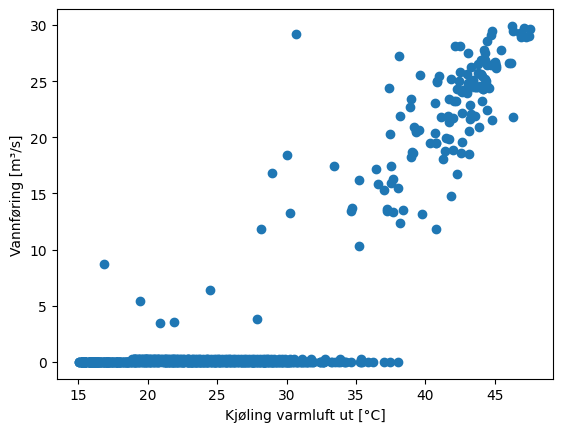

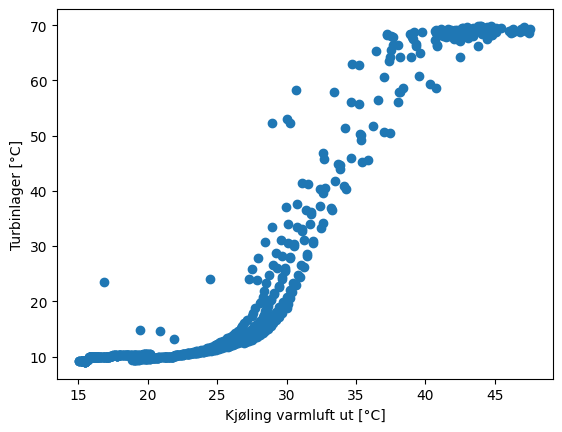

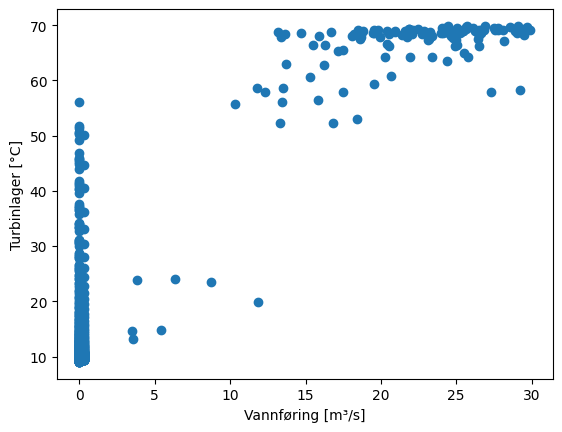

In [24]:
first_700 = data[:700]
time = first_700['timestamp']
temperatur = first_700['Viklingstemperatur L1 [°C]']
strøm = first_700['Strøm [A]']

keys = first_700.columns.values.tolist()

for main_key in keys:
    for key in keys:
        if main_key == key:
            continue
        elif keys.index(main_key) > keys.index(key):
            continue
        plt.scatter(first_700[main_key], first_700[key], label=f'{main_key} vs {key}')
        plt.xlabel(main_key)
        plt.ylabel(key)
        plt.show()

MSE: 23.258311483959005
MAE: 3.2670577886259076


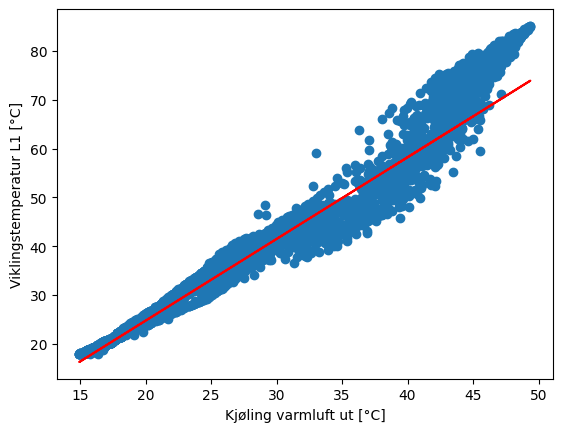

In [61]:
X_train = train.drop(columns=['Viklingstemperatur L1 [°C]'], axis=1)
y_train = train['Viklingstemperatur L1 [°C]']

X_val = validation.drop('Viklingstemperatur L1 [°C]', axis=1)
y_val = validation['Viklingstemperatur L1 [°C]']

X_test = test.drop('Viklingstemperatur L1 [°C]', axis=1)
y_test = test['Viklingstemperatur L1 [°C]']

# weights = y_train**2 / y_train.max()

model = LinearRegression()
model.fit(X_train['Kjøling varmluft ut [°C]'].values.reshape(-1, 1), y_train) #  sample_weight=weights
predictions = model.predict(X_val['Kjøling varmluft ut [°C]'].values.reshape(-1, 1))

mse = np.mean((predictions - y_val) ** 2)
print(f'MSE: {mse}')

mae = mean_absolute_error(y_val, predictions)
print(f'MAE: {mae}')

plt.scatter(X_val['Kjøling varmluft ut [°C]'], y_val)
plt.plot(X_val['Kjøling varmluft ut [°C]'], predictions, color='red')
plt.xlabel('Kjøling varmluft ut [°C]')
plt.ylabel('Viklingstemperatur L1 [°C]')
plt.show()


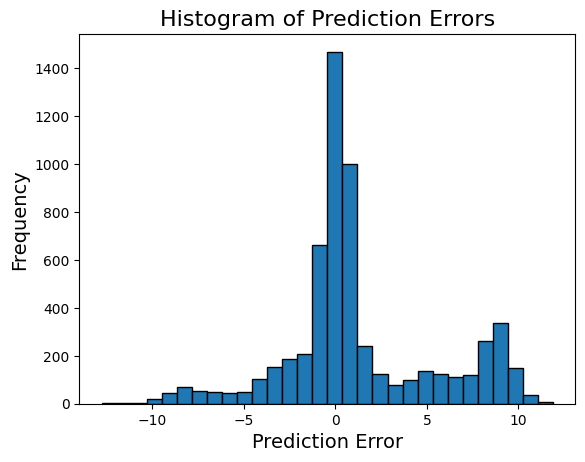

In [26]:
errors = y_val - predictions
plt.hist(errors, bins=30, edgecolor='k')
plt.xlabel('Prediction Error', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of Prediction Errors', fontsize=16)
plt.show()

Test MSE: 19.566105930389572


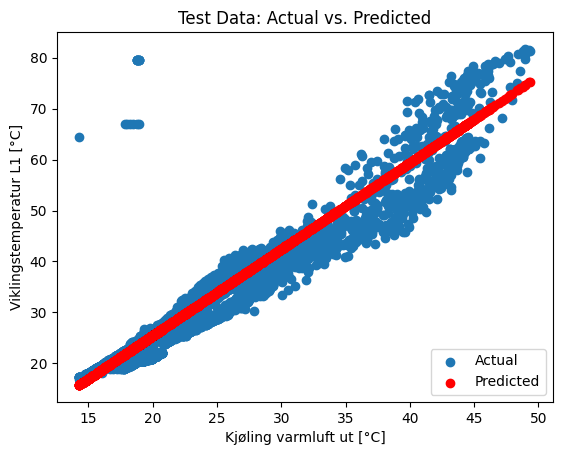

In [27]:
test_predictions = model.predict(X_test['Kjøling varmluft ut [°C]'].values.reshape(-1, 1))

mse_test = np.mean((test_predictions - y_test) ** 2)
print(f'Test MSE: {mse_test}')

plt.scatter(X_test['Kjøling varmluft ut [°C]'], y_test, label='Actual')
plt.scatter(X_test['Kjøling varmluft ut [°C]'], test_predictions, label='Predicted', color='red')
plt.xlabel('Kjøling varmluft ut [°C]')
plt.ylabel('Viklingstemperatur L1 [°C]')
plt.legend()
plt.title('Test Data: Actual vs. Predicted')
plt.show()


MSE: 3.660594078772608
MAE: 1.1841858679038826


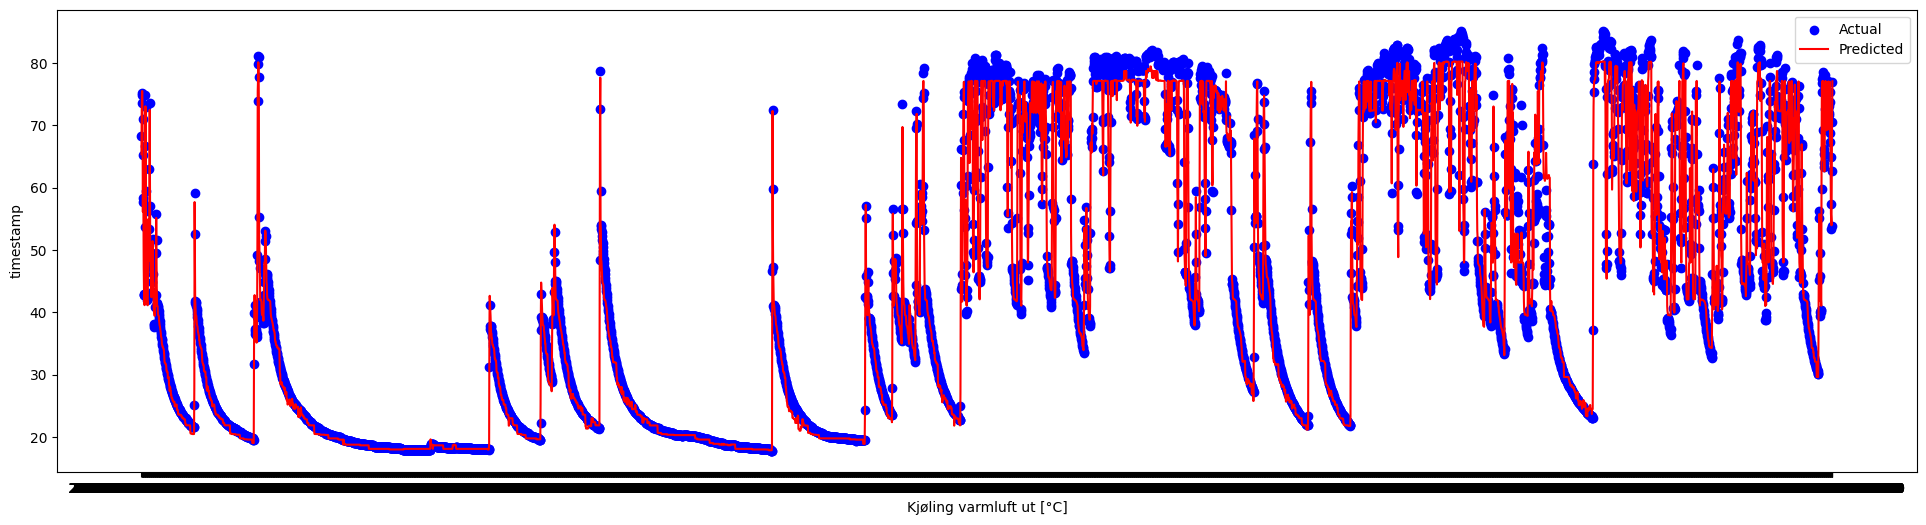

In [ ]:
# Litt mislykka forsøk med RandomForestRegressor:

from sklearn.ensemble import RandomForestRegressor

X_train = train.drop(columns=['Viklingstemperatur L1 [°C]', 'timestamp'])
y_train = train['Viklingstemperatur L1 [°C]']

X_val = validation.drop(columns=['Viklingstemperatur L1 [°C]', 'timestamp'])
y_val = validation['Viklingstemperatur L1 [°C]']

X_test = test.drop(columns=['Viklingstemperatur L1 [°C]', 'timestamp'])
y_test = test['Viklingstemperatur L1 [°C]']

scaler = StandardScaler()
X_train_rfr = scaler.fit_transform(X_train.iloc[:, 1:])
X_val_rfr = scaler.transform(X_val.iloc[:, 1:])

regressor = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    max_depth=7,
)
regressor.fit(X_train_rfr, y_train)

# sort_idx = np.argsort(X_val['Kjøling varmluft ut [°C]'])
# X_sorted = X_val_rfr[sort_idx]
# y_val_sorted = y_val.iloc[sort_idx]

y_pred_sorted = regressor.predict(X_val_rfr)

mse = np.mean((y_pred_sorted - y_val) ** 2)
mae = mean_absolute_error(y_val, y_pred_sorted)

time = validation['timestamp']

print(f'MSE: {mse}')
print(f'MAE: {mae}')

plt.figure(figsize=(24, 6))
plt.scatter(time, y_val, color='blue', label='Actual')
plt.plot(time, y_pred_sorted, color='red', label='Predicted')
plt.xlabel('Kjøling varmluft ut [°C]')
plt.ylabel('timestamp')
plt.legend()
plt.show()


In [ ]:
selected_features = ['Kjøling varmluft ut [°C]', 'Strøm [A]', 'Spenning [kV]', 'Kjøling kaldluft inn [°C]', 'Vannføring [m³/s]', 'Turbinlager [°C]', 'Aktiv effekt [MW]', 'Reaktiv effekt [MVAr]']
X_train_nn = train[selected_features]
y_train_nn = train['Viklingstemperatur L1 [°C]']
X_val_nn = validation[selected_features]
y_val_nn = validation['Viklingstemperatur L1 [°C]']
X_test_nn = test[selected_features]
y_test_nn = test['Viklingstemperatur L1 [°C]']

scaler = StandardScaler()
X_train_nn = scaler.fit_transform(X_train_nn)
X_val_nn = scaler.transform(X_val_nn)
X_test_nn = scaler.transform(test[selected_features])

model = Sequential(
    [
        Dense(8, activation='relu', input_shape=(X_train_nn.shape[1],), name='layer_1'),
        # Dense(32, activation='relu', name='layer_2'),
        # Dense(16, activation='relu', name='layer_3'),
        Dense(1, name='output')
    ]
)

model.compile(
    optimizer=Adam(learning_rate=0.001), 
    loss='mse',
    metrics=['mae']
)

history = model.fit(
    X_train_nn,
    y_train_nn,
    epochs=300,
    batch_size=128,
    validation_data=(X_val_nn, y_val_nn)
)

predictions_nn = model.predict(X_val_nn)

mse_nn = np.mean((predictions_nn.flatten() - y_val_nn) ** 2)
print(f'Neural Network MSE: {mse_nn}')

train_prediction = model.predict(X_train_nn)
test_prediction = model.predict(X_test_nn)


Epoch 1/300


/home/ksund/Documents/diverse/Caseoppgave_Åenergi/Aenergi/energi_env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2226.5669 - mae: 41.9306 - val_loss: 2309.0850 - val_mae: 42.4792
Epoch 2/300
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - loss: 2220.6604 - mae: 41.9087 - val_loss: 2290.7800 - val_mae: 42.2632
Epoch 3/300
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - loss: 2185.8235 - mae: 41.5036 - val_loss: 2272.6042 - val_mae: 42.0476
Epoch 4/300
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - loss: 2180.5002 - mae: 41.3779 - val_loss: 2254.5725 - val_mae: 41.8327
Epoch 5/300
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - loss: 2162.4282 - mae: 41.1928 - val_loss: 2236.6389 - val_mae: 41.6178
Epoch 6/300
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - loss: 2145.2666 - mae: 40.9483 - val_loss: 2218.8647 - val_mae: 41.4037
Epoch 7/300
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - loss: 2129.7874 - mae: 40.8061 - val_loss: 2201.1956 - val_mae: 41.1897
Epoch 8/300
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - loss: 2120.8579 - mae: 40.6849 - val_loss: 2183.6272 -

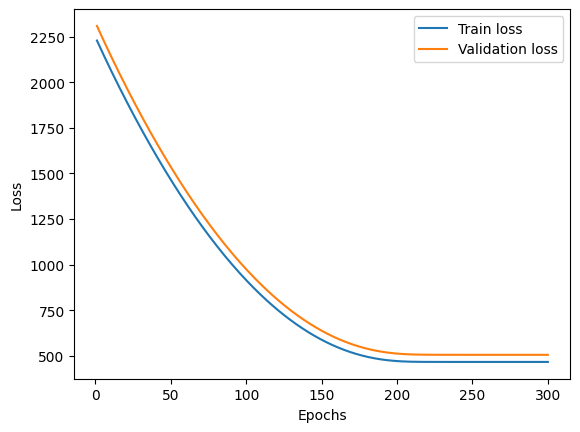

In [58]:
train_losses = history.history["loss"]
val_losses = history.history["val_loss"]
epochs = np.arange(1, len(train_losses) + 1)
plt.plot(epochs, train_losses, label="Train loss")
plt.plot(epochs, val_losses, label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### DEL 2

Innenfor LLM (Large Language Models) har vi chatbotter som GPT-4. De er store navrale nettverk som har trent på my data og kan generere tekst som mennesker kan lese. Dete gjør dem i stand til å svare på spørsmål, lage oppsummeringer eller lignede.

RAG (Retrieval-Augmented Generation) kombinerer LLM med en søkemotor eller database. Det gjør at LLM-en har tilgang til den nyeste og mest relevante dataene. Svarene som genereres av den da vil da være mye mer nøyaktige. 


Vi kan lage en løsning der en bruker kan sende inn spørsmål til en chatbot. Spørsmålet kan så sendes videre gjennom et API til for eksempel en server kjørende i en sky (som Azure). Her bruker vi RAG til å hente relevante data (gjøres av en "retriever") ved å sende SQL-spørringer for å hente sanntidsdata i databasen (med for eksempel PostgreSQL). Deretter kan det sendes til en LLM (GPT-4 gir ganske gode svar og vil være et naturlig valg av LLM) som kan sette sammen dataene til en tekst. API-et kan så sende dette svaret tilbake til chatbotten.

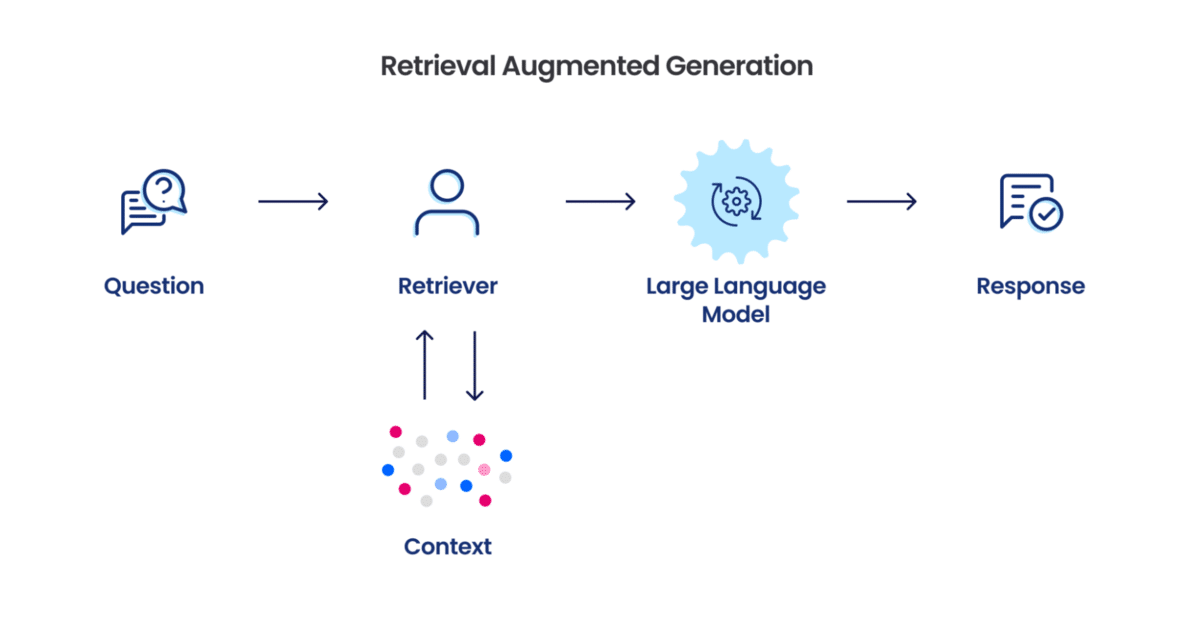
<br/>
kilde: https://pub.towardsai.net/rag-explained-key-component-in-large-language-model-llm-e9b8e2083a45
